In [1]:
import pandas as pd

In [2]:
bank = pd.read_csv('bank-full.csv')

In [3]:
#store column names
cols = bank.columns[0].split(';')
for i in range(len(cols)):
    cols[i] = cols[i].replace('"','')

In [4]:
# split original column
bank.columns = ['col']
bank = bank['col'].str.replace('"','').str.split(';', expand = True)
bank.columns = cols

In [5]:
bank.dtypes

age          object
job          object
marital      object
education    object
default      object
balance      object
housing      object
loan         object
contact      object
day          object
month        object
duration     object
campaign     object
pdays        object
previous     object
poutcome     object
y            object
dtype: object

In [6]:
bank['age'] = bank['age'].astype('int')
bank['balance'] = bank['balance'].astype('int')
bank['day'] = bank['day'].astype('int')
bank['duration'] = bank['duration'].astype('int')
bank['campaign'] = bank['campaign'].astype('int')
bank['pdays'] = bank['pdays'].astype('int')
bank['previous'] = bank['previous'].astype('int')

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int32 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int32 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int32 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int32 
 12  campaign   45211 non-null  int32 
 13  pdays      45211 non-null  int32 
 14  previous   45211 non-null  int32 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int32(7), object(10)
memory usage: 4.7+ MB


In [8]:
# data preprocessing
# check nan & null value
bank.isna().sum(axis = 0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank.isnull().sum(axis = 0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
# check duplicate record
bank.duplicated().sum()

0

In [11]:
# # dealing with outliers
# for col in numeric_col:
#     if_outlier = np.abs(WF_train.loc[:,col] - WF_train.loc[:,col].mean())/WF_train.loc[:,col].std()>3
#     outlier_col_index = WF_train[if_outlier].index
#     outlier_index = outlier_index + outlier_col_index.tolist()
# WF_train.drop(index = np.unique(outlier_index), inplace = True)
# WF_train.reset_index(inplace = True, drop = True)

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

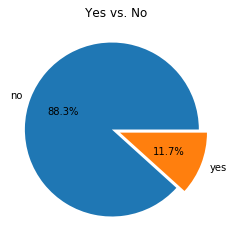

In [13]:
# exploaratory analysis
# visualize success vs. failure to 
label = []
values = []
for (i,counts) in bank['y'].value_counts().items():
    label.append(i)
    values.append(counts)

fig, ax = plt.subplots()
plt.pie(x=values, labels =label,explode=[0.05]*2, autopct="%.1f%%")
plt.title('Yes vs. No')
plt.show()

In [14]:
# data preparation for stacked bar plot
total_df = bank.groupby('job')['y'].count().reset_index()
no_df = bank[bank['y'] =='no'].groupby('job').count().reset_index()

In [88]:
total_df

,job,y
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


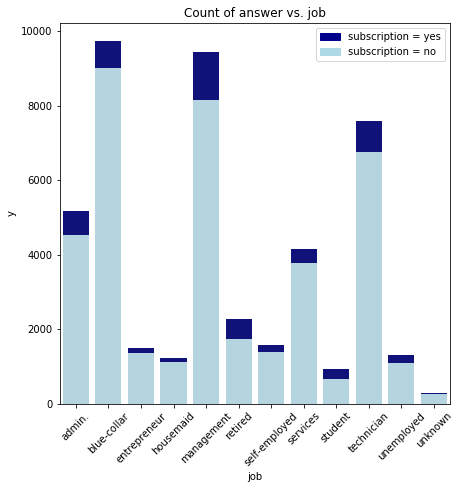

In [90]:
# stacked bar plot showing campaign condition by job
plt.figure(figsize=(7,7))
bar_total = sns.barplot(x='job', y ='y', data = total_df,color='darkblue')
bar_no = sns.barplot(x='job', y ='y', data = no_df ,color='lightblue',ci=None)
top_bar = mpatches.Patch(color='darkblue', label='subscription = yes')
bottom_bar = mpatches.Patch(color='lightblue', label='subscription = no')
plt.legend(handles=[top_bar, bottom_bar])
plt.setp(bar_total.get_xticklabels(), rotation=45)
plt.title('Count of answer vs. job')
plt.show()

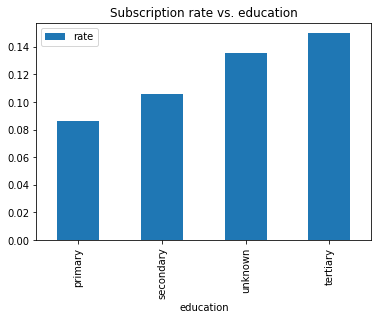

In [91]:
# what is the education level with the highest acceptance rate
total = bank.groupby('education')['y'].count().reset_index()
yes_df = bank[bank['y'] =='yes'].groupby('education').count().reset_index()
total['rate'] = yes_df['y']/total['y']
total = total.sort_values('rate',ascending = True)
ax= total.plot(kind='bar',
          x='education',
          y='rate')
plt.title('Subscription rate vs. education')
plt.show()

In [137]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1929,24,507,3,257,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4175,64,5966,22,983,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
15184,30,2593,27,662,7,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5171,22,104,18,509,1,185,3,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3164,49,341,15,520,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11241,30,321,20,738,2,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
7015,32,1732,14,1871,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18877,24,299,6,209,1,321,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
10063,34,3527,21,1022,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Sample Data

In [18]:
suc_sample = bank[bank['y'] =='yes'].sample(frac = 2, replace = True, random_state = 0).reset_index(drop = True)
fal_sample = bank[bank['y'] =='no'].sample(frac = 0.25, replace = True,random_state = 0).reset_index(drop = True)

In [19]:
df = pd.concat([suc_sample, fal_sample]).reset_index(drop = True)

In [20]:
# transform categorical data into numeric
# extract categorical columns
c_cols = df.select_dtypes('object').columns.tolist()
c_cols.remove('y')
df_new = pd.get_dummies(data=df, columns=c_cols)

In [21]:
df_new['y'] = df_new['y'].map({'yes':1,'no':0})

In [22]:
# train test split
from sklearn.model_selection import train_test_split
x_col = df_new.columns.tolist()
x_col.remove('y')
Y = df_new['y']
X = df_new[x_col]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Logistic regression

In [28]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split, cross_val_score

In [29]:
from sklearn.metrics import classification_report

In [30]:
from sklearn.linear_model import LogisticRegression

In [67]:
def cross_validation(clf, X, Y):
    scores = cross_val_score(clf, X, Y, cv =5)
    avg = sum(scores)/len(scores)
    print('Accuracy by 5 folds cross validation:')
    print(f"{round(avg,4)*100}%")
    return avg

In [70]:
# l2 penalty logistic regression
lr = LogisticRegression(random_state=0)
lr.fit(X_train_std, Y_train)
# hold-out test
acc_lr = cross_validation(lr,X_test_std,Y_test)

Accuracy by 5 folds cross validation:
83.38%


In [71]:
# model evaluation
print(classification_report(Y_test, lr_pred,target_names=['no','yes'] ))

              precision    recall  f1-score   support

          no       0.83      0.84      0.83      3023
         yes       0.84      0.83      0.84      3145

    accuracy                           0.83      6168
   macro avg       0.83      0.83      0.83      6168
weighted avg       0.83      0.83      0.83      6168



AUC score: 
 0.5079391333112802


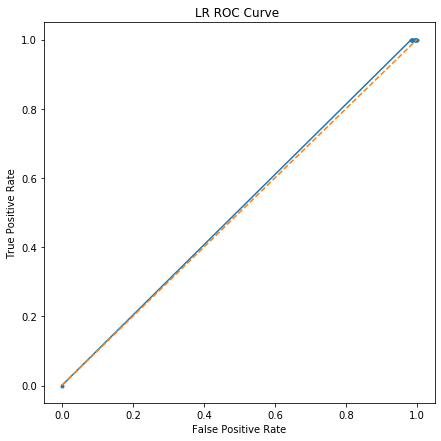

In [135]:
#predict the probability of the data points belongs to each class
Y_pred_prob = lr.predict_proba(X_test)
#calculate false positve, true positive rate,
#known that roc curve is TP vs. FP
FP_rate, TP_rate, threshold = roc_curve(Y_test, Y_pred_prob[:,1])
print("AUC score: \n" ,roc_auc_score(Y_test, Y_pred_prob[:,1]))
#plot roc curve
plt.subplots(1,figsize=(7,7))
plt.title("LR ROC Curve ")
plt.plot(FP_rate, TP_rate, marker='.')
plt.plot([0,1], ls="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## SVM

In [38]:
from sklearn import svm

In [39]:
from sklearn.decomposition import PCA

In [40]:
#predict with default parameters
lin_clf = svm.LinearSVC(max_iter=10000)
lin_clf.fit(X_train_std,Y_train)
lin_clf_pred = lin_clf.predict(X_test_std)
print(f"Linear SVM Accuracy: \n {round(metrics.accuracy_score(Y_test, lin_clf_pred)*100,2)}%")

Linear SVM Accuracy: 
 83.48%


C:\Users\13154\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### PCA dimension reduction

In [41]:
# define n components
n_components = len(X_train_std[0])-1

In [42]:
pca = PCA(n_components=n_components)
pca_df = pd.DataFrame(pca.fit_transform(X_train_std))

In [43]:
sum(pca.explained_variance_ratio_)

0.9999999999999998

Text(0, 0.5, 'Proportion Variance Explained')

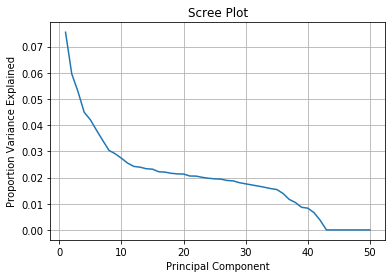

In [44]:
plt.figure()
explained_var = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_var)+1), explained_var)
plt.grid(True)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion Variance Explained")
plt.show()

Text(0, 0.5, 'Cumulative Sum of Variance Explained')

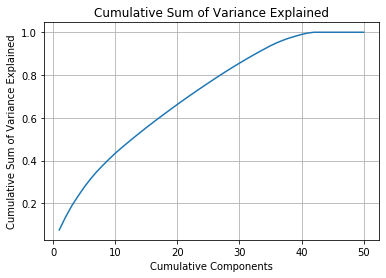

In [45]:
cum_sum = np.cumsum(explained_var)
plt.figure()
plt.plot(np.arange(1, len(explained_var)+1), cum_sum)
plt.grid(True)
plt.title("Cumulative Sum of Variance Explained")
plt.xlabel("Cumulative Components")
plt.ylabel("Cumulative Sum of Variance Explained")
plt.show()

In [46]:
data_df = pca_df.iloc[:,:30]

In [47]:
test_df = pd.DataFrame(pca.transform(X_test_std))

In [72]:
#predict with default parameters
svm_clf = svm.LinearSVC(max_iter=10000)
svm_clf.fit(data_df,Y_train)
svm_clf_pred = lin_clf.predict(test_df.iloc[:,:30])
# print(f"Linear SVM Accuracy: \n {round(metrics.accuracy_score(Y_test, lin_clf_pred)*100,2)}%")A
acc_svc = cross_validation(svm_clf,test_df.iloc[:,:30], Y_test)

Linear SVM Accuracy: 
 80.72%
Accuracy by 5 folds cross validation:
80.67%


0.8067450881420053

Accuracy by 5 folds cross validation:
80.69%
Accuracy by 5 folds cross validation:
80.69%
Accuracy by 5 folds cross validation:
80.69%
Accuracy by 5 folds cross validation:
80.67%
Accuracy by 5 folds cross validation:
80.67%
Accuracy by 5 folds cross validation:
80.67%
Accuracy by 5 folds cross validation:
80.67%
Accuracy by 5 folds cross validation:
80.67%
Accuracy by 5 folds cross validation:
80.67%


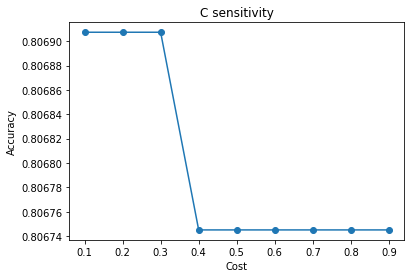

In [103]:
C = np.arange(0.1, 1, 0.1)
acc_svm = []
for c in C:
    svm_clf = svm.LinearSVC(max_iter=10000, C = c)
    svm_clf.fit(data_df,Y_train)
    svm_clf_pred = lin_clf.predict(test_df.iloc[:,:30])
    # print(f"Linear SVM Accuracy: \n {round(metrics.accuracy_score(Y_test, lin_clf_pred)*100,2)}%")A
    acc_svc = cross_validation(svm_clf,test_df.iloc[:,:30], Y_test)
    acc_svm.append(acc_svc)
plt.plot(C, acc_svm, marker = 'o')
plt.title('C sensitivity')
plt.xlabel('Cost')
plt.ylabel('Accuracy')
plt.show()

In [49]:
print(classification_report(Y_test, lin_clf_pred, target_names = ['no','yes']))

              precision    recall  f1-score   support

          no       0.80      0.81      0.80      3023
         yes       0.82      0.80      0.81      3145

    accuracy                           0.81      6168
   macro avg       0.81      0.81      0.81      6168
weighted avg       0.81      0.81      0.81      6168



AUC score: 
 0.8821670846772518


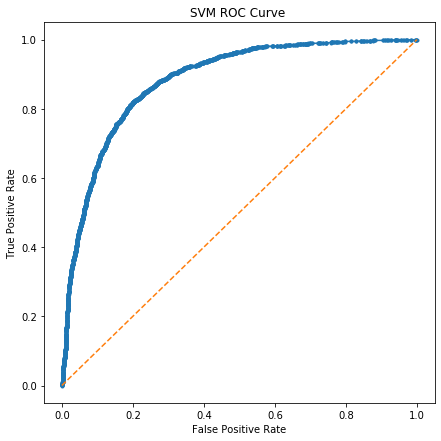

In [136]:
#predict the probability of the data points belongs to each class
Y_pred_prob = svm_clf.decision_function(test_df.iloc[:,:30])
#calculate false positve, true positive rate,
#known that roc curve is TP vs. FP
FP_rate, TP_rate, threshold = roc_curve(Y_test, Y_pred_prob)
print("AUC score: \n" ,roc_auc_score(Y_test, Y_pred_prob))
#plot roc curve
plt.subplots(1,figsize=(7,7))
plt.title("SVM ROC Curve ")
plt.plot(FP_rate, TP_rate, marker='.')
plt.plot([0,1], ls="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_clf = RandomForestClassifier(n_estimators=20, max_features=5, random_state=5)
Random_forest_clf.fit(X_train, Y_train)
RF_clf_pred = Random_forest_clf.predict(X_test)
print(f"Accuracy of random forest algorithm: \n {round(metrics.accuracy_score(Y_test, RF_clf_pred)*100,2)}%")

Accuracy of random forest algorithm: 
 91.55%


In [85]:
# hyperparameter tuning
rf_par = {'n_estimators':[10,50,100],
         'max_features':[3,5,7],
         'max_depth':[5,25,50],
         'criterion':['gini','entropy']}
cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=5)
random_forest_grid = GridSearchCV(RandomForestClassifier(random_state = 5),
                                 param_grid=rf_par,
                                 cv=cv)
random_forest_grid.fit(X_train,Y_train)
print("Best parameters for Random forest are:")
for index, values in random_forest_grid.best_params_.items():
    print(f"{index}:{values}")

Best parameters for Random forest are:
criterion:entropy
max_depth:50
max_features:7
n_estimators:100


In [83]:
Random_forest_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [82]:
random_forest_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
RF_best_pred = random_forest_grid.best_estimator_.predict(X_test)
print(f"Accuracy of random forest algorithm after tuning: \n {round(metrics.accuracy_score(Y_test, RF_best_pred)*100,2)}%")

Accuracy of random forest algorithm after tuning: 
 92.09%


In [101]:
print(classification_report(Y_test, RF_best_pred, target_names = ['no','yes']))

              precision    recall  f1-score   support

          no       0.95      0.88      0.92      3023
         yes       0.89      0.96      0.93      3145

    accuracy                           0.92      6168
   macro avg       0.92      0.92      0.92      6168
weighted avg       0.92      0.92      0.92      6168



AUC score: 
 0.9807488113125287


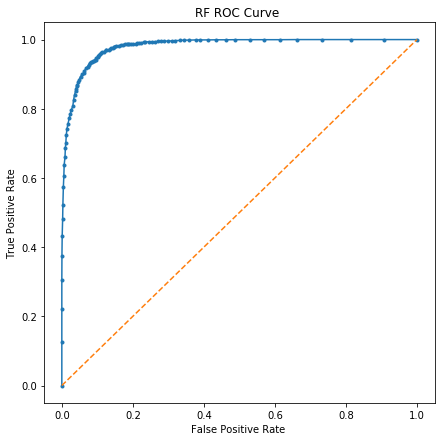

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score
#predict the probability of the data points belongs to each class
Y_pred_prob = random_forest_grid.best_estimator_.predict_proba(X_test)
#calculate false positve, true positive rate,
#known that roc curve is TP vs. FP
FP_rate, TP_rate, threshold = roc_curve(Y_test, Y_pred_prob[:,1])
print("AUC score: \n" ,roc_auc_score(Y_test, Y_pred_prob[:,1]))
#plot roc curve
plt.subplots(1,figsize=(7,7))
plt.title("RF ROC Curve ")
plt.plot(FP_rate, TP_rate, marker='.')
plt.plot([0,1], ls="--")
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.show()

In [125]:
# extract feature importance of random forest

# extract feature importances
fi_df = pd.DataFrame(random_forest_grid.best_estimator_.feature_importances_, columns=['Importances'])
fi_df['feature_name'] =  X.columns
fi_df.sort_values(by=['Importances'], ascending=True, inplace=True)
fi_df_new = fi_df[fi_df['Importances']>0.03]
fi_df.sort_values(by=['Importances'], inplace=True)

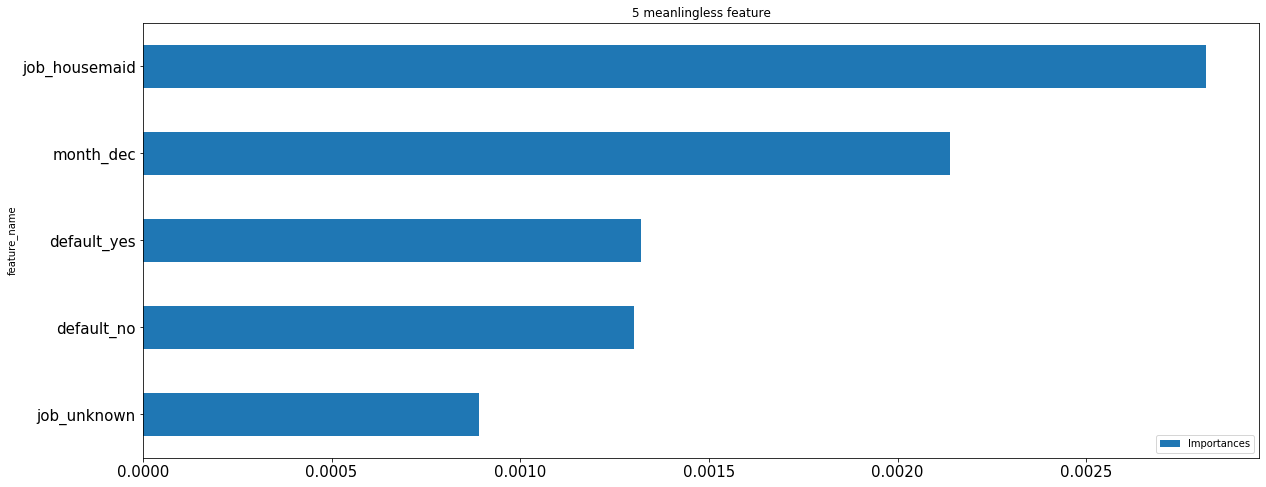

In [131]:
fi_df.head().plot.barh(x='feature_name', 
               y ='Importances',
               figsize=(20,8), 
               title='5 meanlingless feature', 
               fontsize=15)
plt.show()

<Figure size 1440x720 with 0 Axes>

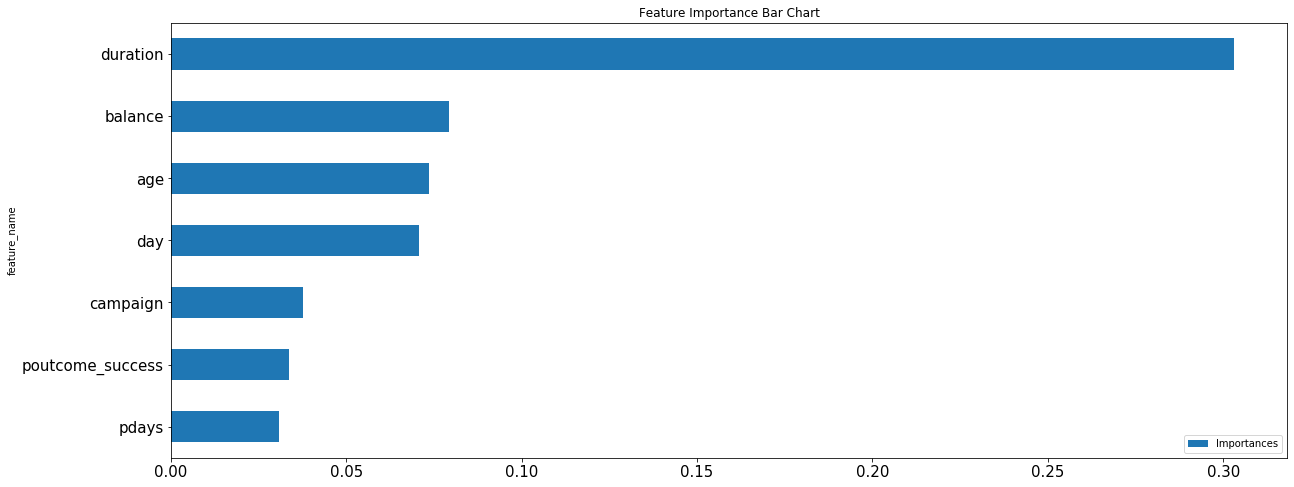

In [109]:
plt.figure(figsize=(20,10))
fi_df_new.plot.barh(x='feature_name', 
               y ='Importances',
               figsize=(20,8), 
               title='Feature Importances', 
               fontsize=15)
plt.title('Feature Importance Bar Chart')
plt.show()